## Gold Prices EDA 2000 to 2022

Link to Data: https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data

### Necessary Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

### Read in Data

In [2]:
df_gold = pd.read_csv('gold.csv') # Read in data
df_gold = df_gold[:-1] # Remove last day that lacked volume data
df_gold

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD
...,...,...,...,...,...,...,...
5697,2022-08-26,1771.8,1772.3,1746.2,1749.8,176904,USD
5698,2022-08-29,1748.4,1757.9,1731.4,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.8,1732.9,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.0,1720.6,1726.2,176731,USD


### Describe Data

In [3]:
df_gold.shape

(5702, 7)

In [4]:
df_gold.describe()

,Open,High,Low,Close,Volume
count,5702.000000,5702.000000,5702.000000,5702.000000,5702.000000
mean,1040.265749,1048.219730,1031.744756,1040.178551,139166.071554
std,518.703522,522.321852,514.423290,518.490648,102529.879170
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.575000,463.850000,457.325000,460.450000,52984.000000
50%,1188.650000,1197.850000,1179.600000,1188.650000,126023.000000
75%,1381.000000,1392.600000,1367.950000,1382.975000,193110.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [5]:
df_gold.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [6]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5702 non-null   object 
 1   Open      5702 non-null   float64
 2   High      5702 non-null   float64
 3   Low       5702 non-null   float64
 4   Close     5702 non-null   float64
 5   Volume    5702 non-null   int64  
 6   Currency  5702 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


In [7]:
df_gold.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

### Apply pandas datetime to date

In [8]:
df_gold['Date'] = df_gold['Date'].apply(pd.to_datetime)

In [9]:
df_gold.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object

### Is our data clean?

In [10]:
df_gold.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [11]:
df_gold.duplicated().sum()

0

### Data Visualizations

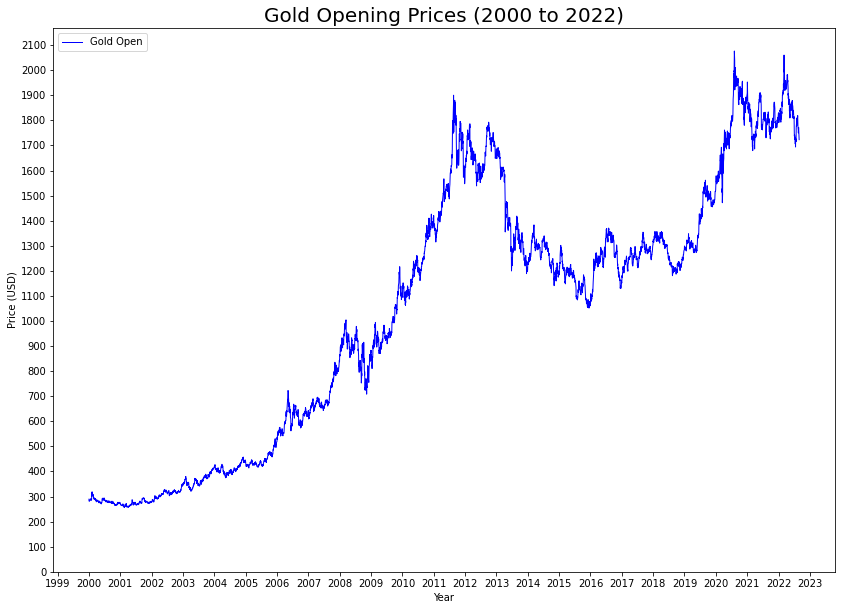

In [29]:
plt.rcParams["figure.figsize"] = (14,10)

x = df_gold.Date
y = df_gold.Open

fig, ax = plt.subplots()

ax.plot(x,y,
       linewidth=1,
       label='Gold Open',
       color='blue'
       )

plt.xlabel("Year")
plt.ylabel("Price (USD)")

y_ticks = []
for i in range(0,22):
    i*=100
    y_ticks.append(i)
plt.yticks(y_ticks)

ax.xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=4))

plt.legend(loc='upper left')
plt.title('Gold Opening Prices (2000 to 2022)', fontsize=20)

plt.show()

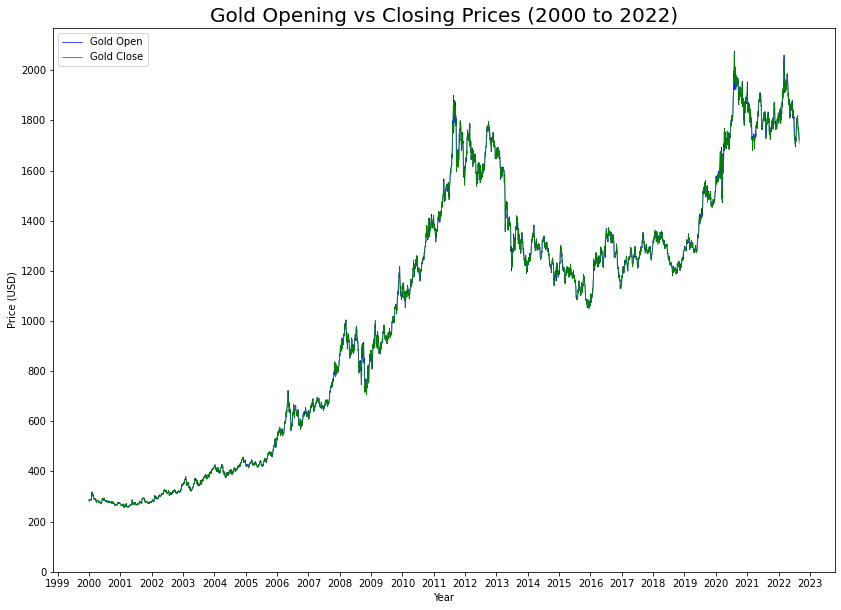

In [60]:
plt.rcParams["figure.figsize"] = (14,10)

fig, ax = plt.subplots()

ax.plot(df_gold.Date, df_gold.Open,
        linewidth=.7,
        label='Gold Open',
        color='blue')

ax.plot(df_gold.Date, df_gold.Close,
        linewidth=.7,
        label='Gold Close',
        color='green')

plt.xlabel("Year")
plt.ylabel("Price (USD)")

y_ticks = []
for i in range(0,11):
    i*=200
    y_ticks.append(i)
plt.yticks(y_ticks)

ax.xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=4))

plt.legend(loc='upper left')
plt.title('Gold Opening vs Closing Prices (2000 to 2022)', fontsize=20)

plt.show()

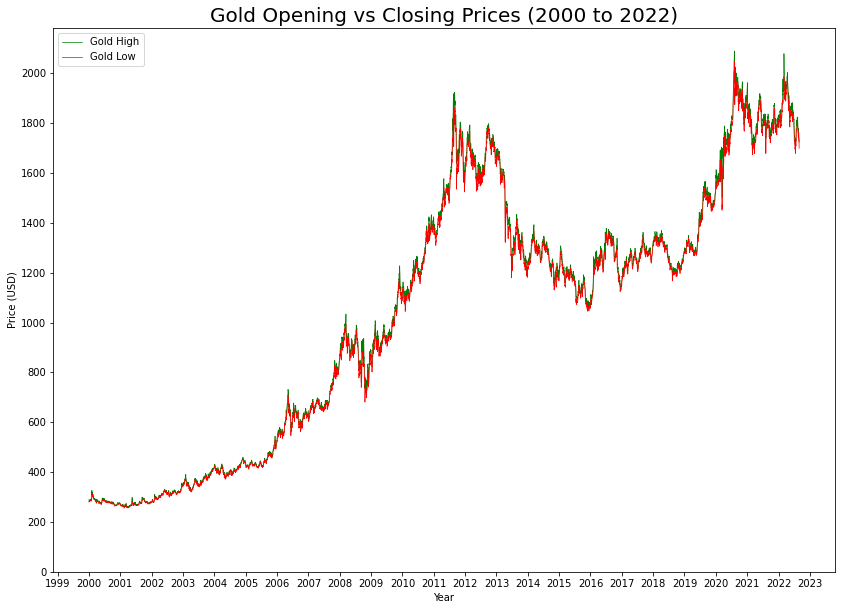

In [59]:
plt.rcParams["figure.figsize"] = (14,10)

fig, ax = plt.subplots()

ax.plot(df_gold.Date, df_gold.High,
        linewidth=.7,
        label='Gold High',
        color='green')

ax.plot(df_gold.Date, df_gold.Low,
        linewidth=.7,
        label='Gold Low',
        color='red')

plt.xlabel("Year")
plt.ylabel("Price (USD)")

y_ticks = []
for i in range(0,11):
    i*=200
    y_ticks.append(i)
plt.yticks(y_ticks)

ax.xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=4))

plt.legend(loc='upper left')
plt.title('Gold Opening vs Closing Prices (2000 to 2022)', fontsize=20)

plt.show()

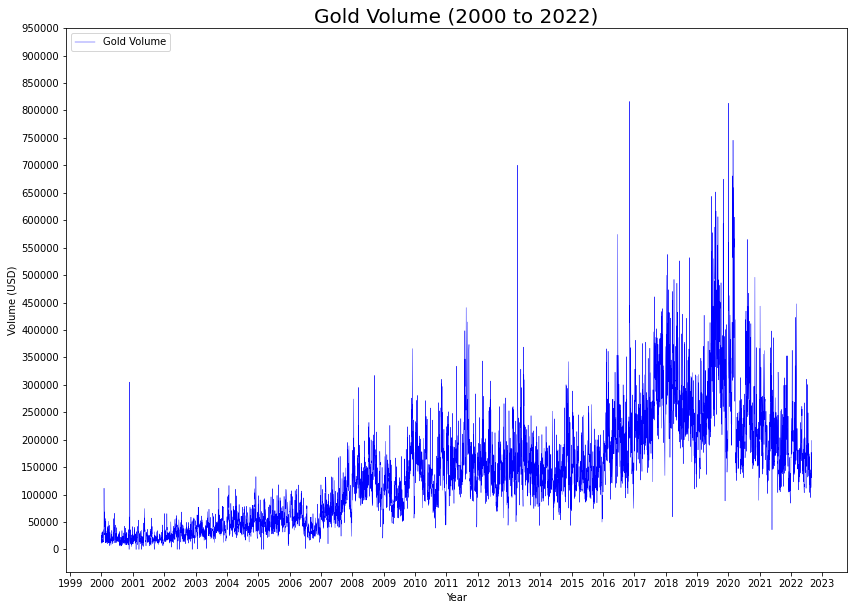

In [57]:
plt.rcParams["figure.figsize"] = (14,10)

fig, ax = plt.subplots()

ax.plot(df_gold.Date, df_gold.Volume,
        linewidth=.4,
        label='Gold Volume',
        color='blue')


plt.xlabel("Year")
plt.ylabel("Volume (USD)")

y_ticks = []
for i in range(0,20):
    i*=50000
    y_ticks.append(i)
plt.yticks(y_ticks)

ax.xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=4))

plt.legend(loc='upper left')
plt.title('Gold Volume (2000 to 2022)', fontsize=20)

plt.show()